In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(10)
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [4]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
for i in ['sex','cp','fbs','restecg','exang','slope','ca','thal']:
    print('Col "{}" contains {} unique values'.format(i, df[i].unique().shape[0]))

Col "sex" contains 2 unique values
Col "cp" contains 4 unique values
Col "fbs" contains 2 unique values
Col "restecg" contains 3 unique values
Col "exang" contains 2 unique values
Col "slope" contains 3 unique values
Col "ca" contains 5 unique values
Col "thal" contains 4 unique values


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

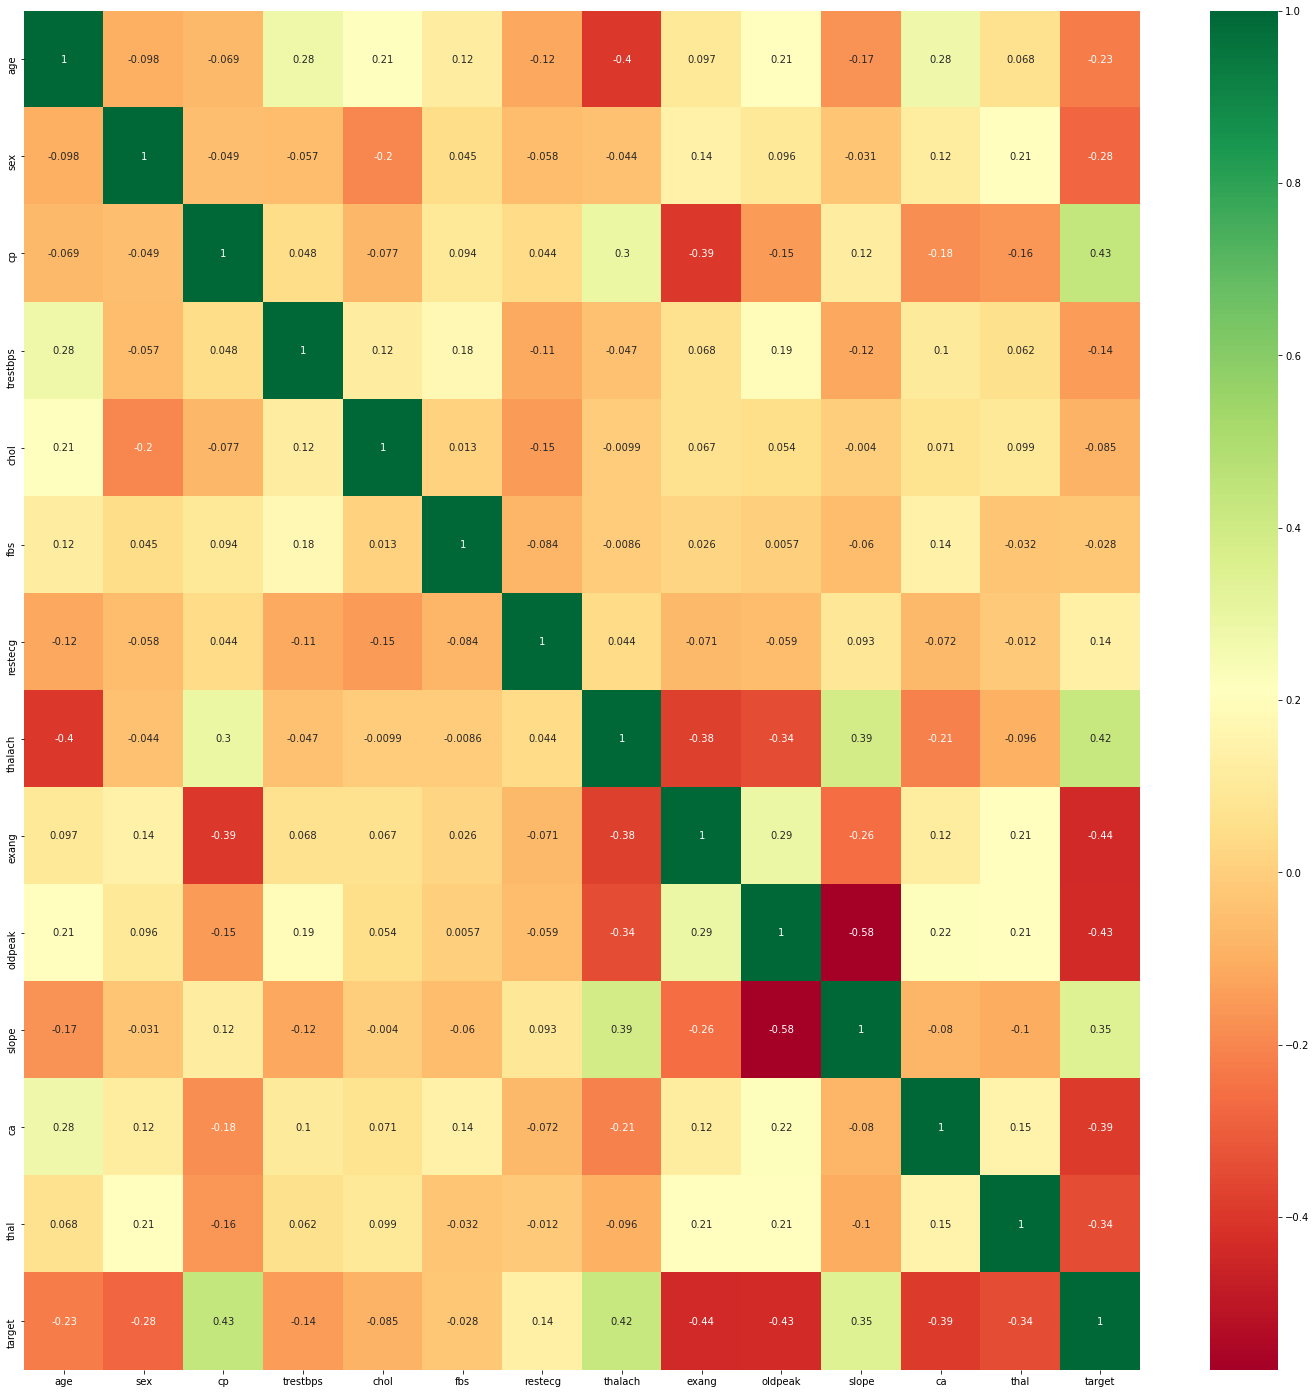

In [8]:
plt.figure(figsize=(25,25))
g = sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

<AxesSubplot:xlabel='target', ylabel='count'>

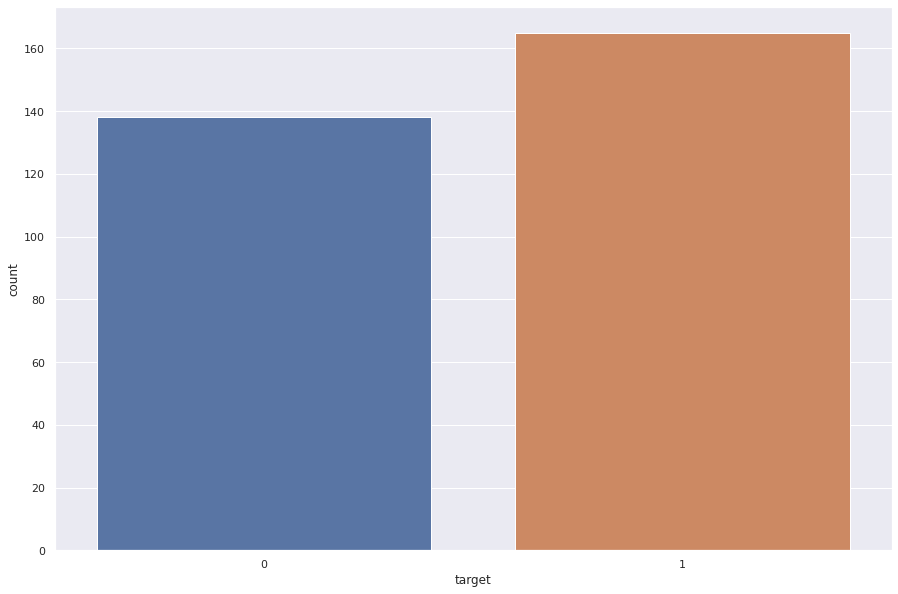

In [9]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,10))
sns.countplot(x='target',data=df)

In [13]:
to_get_dummy=['sex','cp','fbs','restecg','exang','slope','ca','thal']
to_scale=['age','trestbps','chol','thalach','oldpeak']

converted_df = pd.get_dummies(df,columns=to_get_dummy)

scaler = StandardScaler()
converted_df[to_scale]=scaler.fit_transform(converted_df[to_scale])

converted_df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [14]:
converted_df.describe()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,4.690051e-17,-7.035077e-16,-1.113887e-16,-6.800574e-16,2.345026e-17,0.544554,0.316832,0.683168,0.471947,0.165017,...,0.468647,0.577558,0.214521,0.125413,0.066007,0.016502,0.006601,0.059406,0.547855,0.386139
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,0.498835,0.466011,0.466011,0.500038,0.371809,...,0.499842,0.494765,0.411169,0.331734,0.248704,0.127605,0.081110,0.236774,0.498528,0.487668
min,-2.797624e+00,-2.148802e+00,-2.324160e+00,-3.439267e+00,-8.968617e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.572802e-01,-6.638668e-01,-6.814943e-01,-7.061105e-01,-8.968617e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.988599e-02,-9.273778e-02,-1.210553e-01,1.466343e-01,-2.067053e-01,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,7.316189e-01,4.783913e-01,5.456738e-01,7.151309e-01,4.834512e-01,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,2.496240e+00,3.905165e+00,6.140401e+00,2.289429e+00,4.451851e+00,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
features = converted_df.drop(['target'],axis=1)
features = features.to_numpy()
labels = converted_df['target']
labels = labels.to_numpy()

print(features.shape)
print(labels.shape)

(303, 30)
(303,)


In [112]:
 X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20,random_state=2)

              precision    recall  f1-score   support

           0       1.00      0.84      0.92        32
           1       0.85      1.00      0.92        29

    accuracy                           0.92        61
   macro avg       0.93      0.92      0.92        61
weighted avg       0.93      0.92      0.92        61



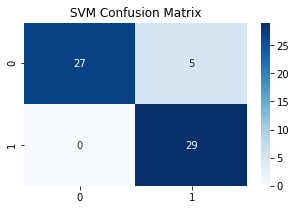

In [106]:
svm = SVC(gamma=0.1)
svm.fit(X_train,y_train)

y_pred = svm.predict(X_test)
print(classification_report(y_test,y_pred))
conf_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,3))
plt.title("SVM Confusion Matrix")
sns.heatmap(conf_matrix,annot=True,cmap="Blues")
plt.show()

In [39]:
# row = X_train[1,:]
# pred = svm.predict(row.reshape(1,-1))
# pred[0]

1

In [40]:
row

array([-0.26098049, -1.34922166, -0.25633371, -0.11574873, -0.81059216,
        0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ])

## Decision Tree

              precision    recall  f1-score   support

           0       0.93      0.81      0.87        32
           1       0.82      0.93      0.87        29

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



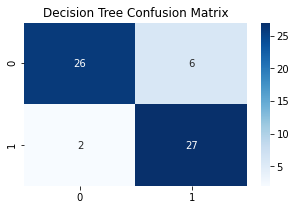

In [121]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=5)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))
conf_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,3))
plt.title("Decision Tree Confusion Matrix")
sns.heatmap(conf_matrix,annot=True,cmap="Blues")
plt.show()

# Random Forest

              precision    recall  f1-score   support

           0       0.96      0.84      0.90        32
           1       0.85      0.97      0.90        29

    accuracy                           0.90        61
   macro avg       0.91      0.90      0.90        61
weighted avg       0.91      0.90      0.90        61



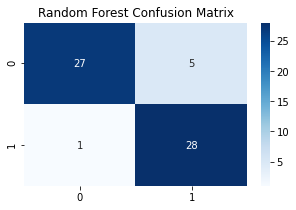

In [129]:
rf = RandomForestClassifier(n_estimators = 10000, random_state = 1)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test,y_pred))
conf_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,3))
plt.title("Random Forest Confusion Matrix")
sns.heatmap(conf_matrix,annot=True,cmap="Blues")
plt.show()

# Save best model

In [ ]:
import pickle 
pickle.dump(svm,open('svm.sav','wb')) 